In [1]:
# import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows',1000)

In [3]:
arrest = pd.read_csv('./datasets/USArrests.csv')

In [4]:
arrest

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
# incorrect column name: we will change city to state
arrest['State'] = arrest['City']
arrest.drop(['City'], axis = 1,inplace = True)

## EDA: Assessing Data Quality

## Expected Data Types

In [6]:
for i in arrest.columns:
    print(i,arrest[i].apply(lambda x: type(x)).unique())
# DATA TYPES ARE AS EXPECTED

Murder [<class 'float'>]
Assault [<class 'int'>]
UrbanPop [<class 'int'>]
Rape [<class 'float'>]
State [<class 'str'>]


###  Missing Data

In [7]:
# Finding null values per column
missing = pd.DataFrame({'Column':[],'Number of missing datapoints':[]})
for i in range(len(arrest.columns)):
    missing.loc[i,['Column']] = arrest.columns[i]
    missing.loc[i,['Number of missing datapoints']] = arrest.iloc[:,i].isnull().sum()

# look at the # of missing points in the first ten columns
missing = missing.sort_values(by = ['Number of missing datapoints'],ascending = False)
missing.reset_index(inplace = True, drop = True)
missing

,Column,Number of missing datapoints
0,Murder,0.0
1,Assault,0.0
2,UrbanPop,0.0
3,Rape,0.0
4,State,0.0


### Duplicates

In [8]:
arrest[arrest.duplicated(keep = False)]

,Murder,Assault,UrbanPop,Rape,State


## Summary Statistics

In [9]:
summary = arrest.describe()

In [10]:
cols = ['Murder','Assault','UrbanPop','Rape']

In [11]:
arrest['Murder'].mode()

0     2.1
1     2.2
2     2.6
3     6.0
4     9.0
5    13.2
6    15.4
Name: Murder, dtype: float64

In [12]:
extra = pd.DataFrame({i:[arrest[i].median(),arrest[i].kurtosis(),arrest[i].skew()] for i in cols}, index = ['Median','Kurtosis','Skewness'])
final = pd.concat([summary,extra],axis = 0)

In [13]:
final

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,7.788000,170.760000,65.540000,21.232000
std,4.355510,83.337661,14.474763,9.366385
min,0.800000,45.000000,32.000000,7.300000
25%,4.075000,109.000000,54.500000,15.075000
50%,7.250000,159.000000,66.000000,20.100000
75%,11.250000,249.000000,77.750000,26.175000
max,17.400000,337.000000,91.000000,46.000000
Median,7.250000,159.000000,66.000000,20.100000
Kurtosis,-0.827488,-1.053848,-0.738360,0.353964


## Understanding the distributions of fields

### Murder Rate

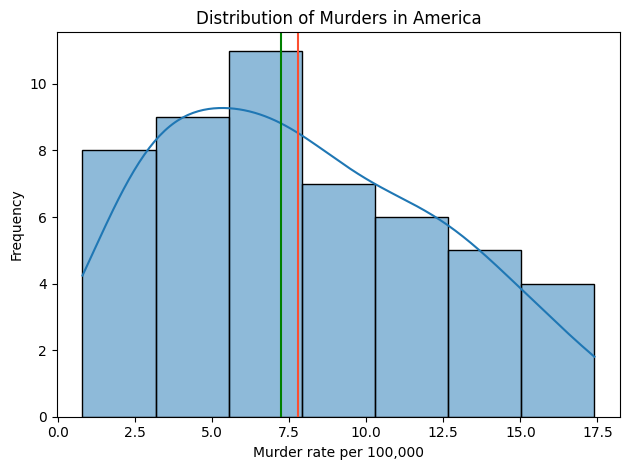

In [14]:
sns.histplot(data = arrest['Murder'],kde = 'True')
plt.axvline(arrest['Murder'].mean(), color = '#fc4f30')
plt.axvline(arrest['Murder'].median(), color = 'g')
plt.xlabel('Murder rate per 100,000')
plt.ylabel('Frequency')
plt.title('Distribution of Murders in America')
plt.grid(visible = False)
plt.tight_layout()
plt.show()

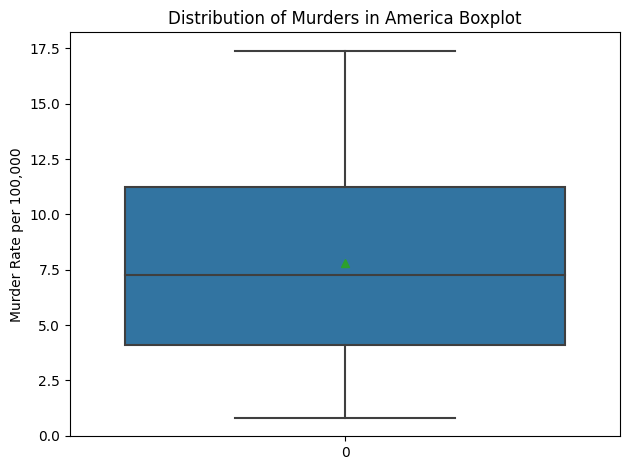

In [15]:
sns.boxplot(data = arrest['Murder'],showmeans = True)
plt.ylabel('Murder Rate per 100,000')
plt.title('Distribution of Murders in America Boxplot')
plt.tight_layout()

### Assault

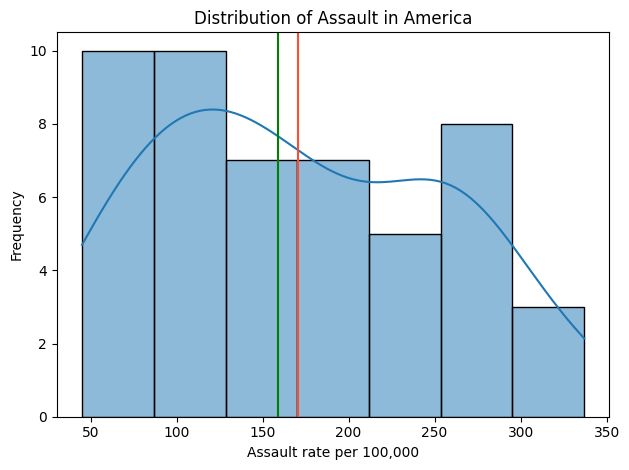

In [16]:
sns.histplot(data = arrest['Assault'],kde = 'True')
plt.axvline(arrest['Assault'].mean(), color = '#fc4f30')
plt.axvline(arrest['Assault'].median(), color = 'g')
plt.xlabel('Assault rate per 100,000')
plt.ylabel('Frequency')
plt.title('Distribution of Assault in America')
plt.grid(visible = False)
plt.tight_layout()
plt.show()

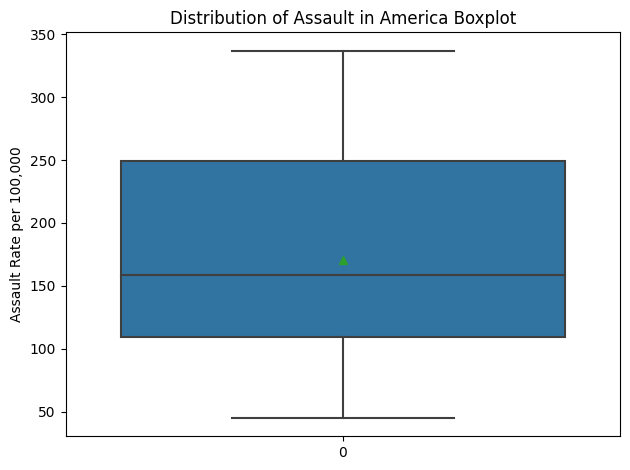

In [17]:
sns.boxplot(data = arrest['Assault'],showmeans = True)
plt.ylabel('Assault Rate per 100,000')
plt.title('Distribution of Assault in America Boxplot')
plt.tight_layout()

### Rape

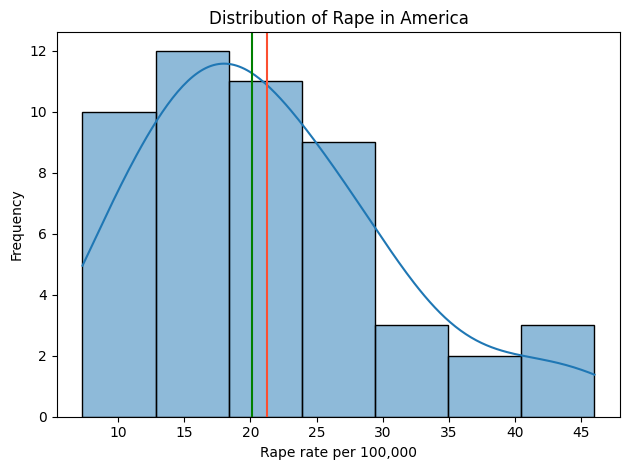

In [18]:
sns.histplot(data = arrest['Rape'],kde = 'True')
plt.axvline(arrest['Rape'].mean(), color = '#fc4f30')
plt.axvline(arrest['Rape'].median(), color = 'g')
plt.xlabel('Rape rate per 100,000')
plt.ylabel('Frequency')
plt.title('Distribution of Rape in America')
plt.grid(visible = False)
plt.tight_layout()
plt.show()

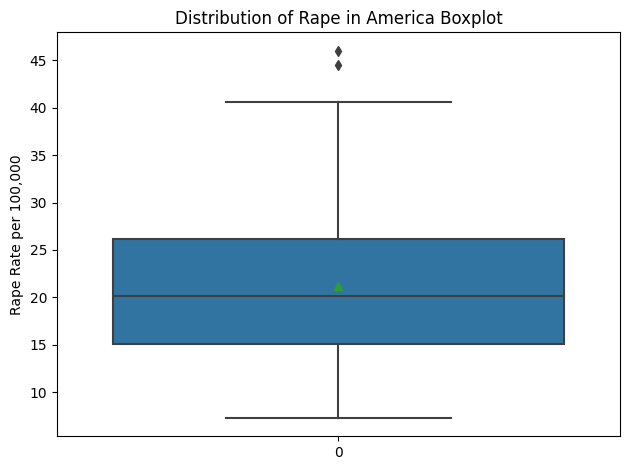

In [19]:
sns.boxplot(data = arrest['Rape'],showmeans = True)
plt.ylabel('Rape Rate per 100,000')
plt.title('Distribution of Rape in America Boxplot')
plt.tight_layout()

## Urban Population

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\941184181.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


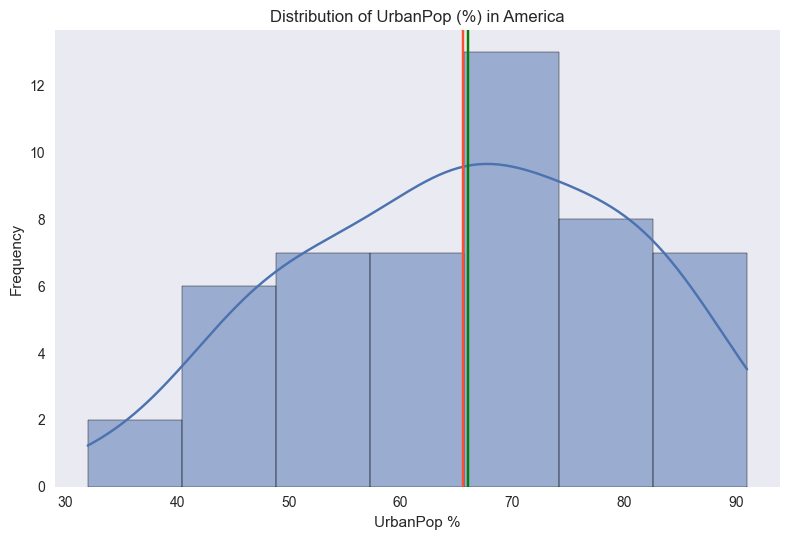

In [20]:
plt.style.use('seaborn')
sns.histplot(data = arrest['UrbanPop'],kde = 'True')
plt.axvline(arrest['UrbanPop'].mean(), color = '#fc4f30')
plt.axvline(arrest['UrbanPop'].median(), color = 'g')
plt.xlabel('UrbanPop %')
plt.ylabel('Frequency')
plt.title('Distribution of UrbanPop (%) in America')
plt.grid(visible = False)
plt.tight_layout()
plt.show()

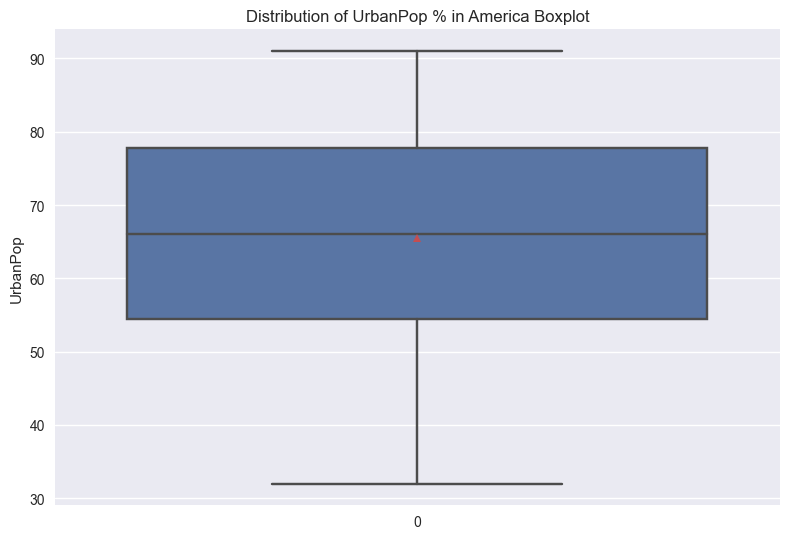

In [21]:
sns.boxplot(data = arrest['UrbanPop'],showmeans = True)
plt.ylabel('UrbanPop')
plt.title('Distribution of UrbanPop % in America Boxplot')
plt.tight_layout()

## Relationships between variables

### Crimes by State

In [22]:
def grapher(x_col,y_col,color):
    crime_data = arrest.sort_values([y_col],ascending = False)
    sns.barplot(x = crime_data[x_col], y = crime_data[y_col],palette = color)
    plt.ylabel(f'{y_col} rate per 100,000')
    plt.title(f'{y_col} rate per 100,000 by State')
    plt.xticks(rotation = 'vertical')
    plt.tight_layout()
    plt.show()

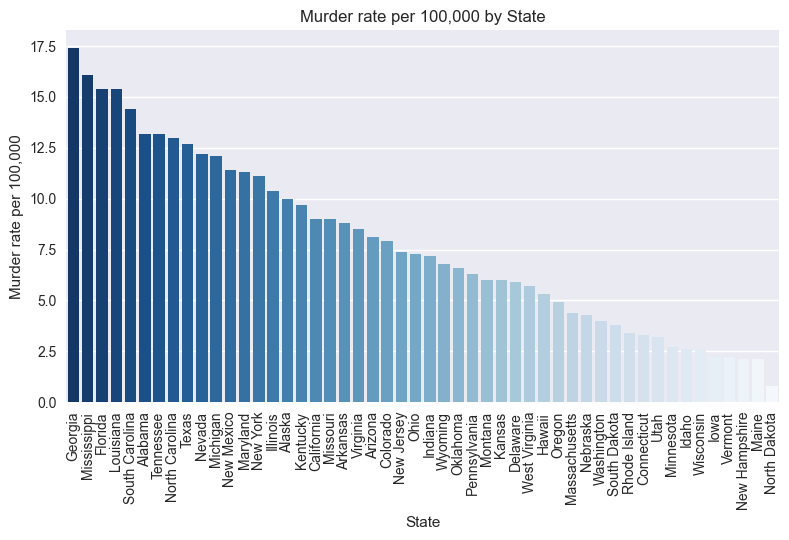

In [23]:
grapher(x_col = 'State',y_col = 'Murder',color = 'Blues_r')

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\71025410.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


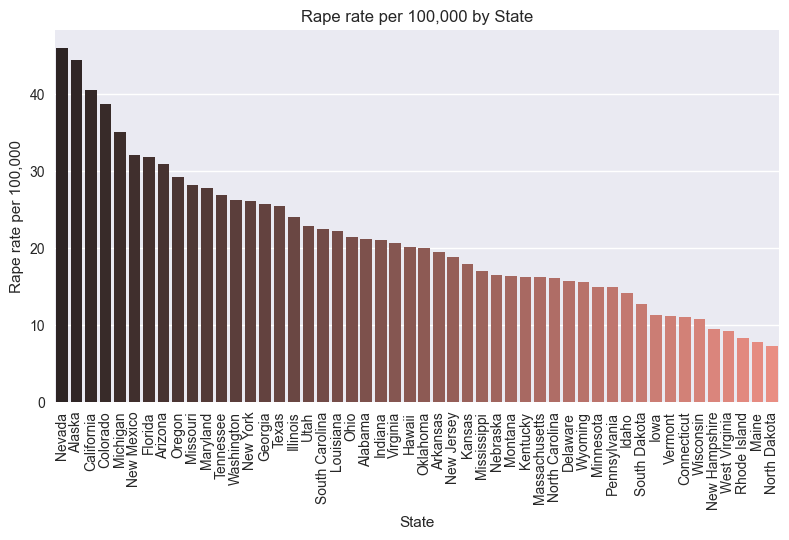

In [24]:
plt.style.use('seaborn')
grapher(x_col = 'State',y_col = 'Rape',color = 'dark:salmon')

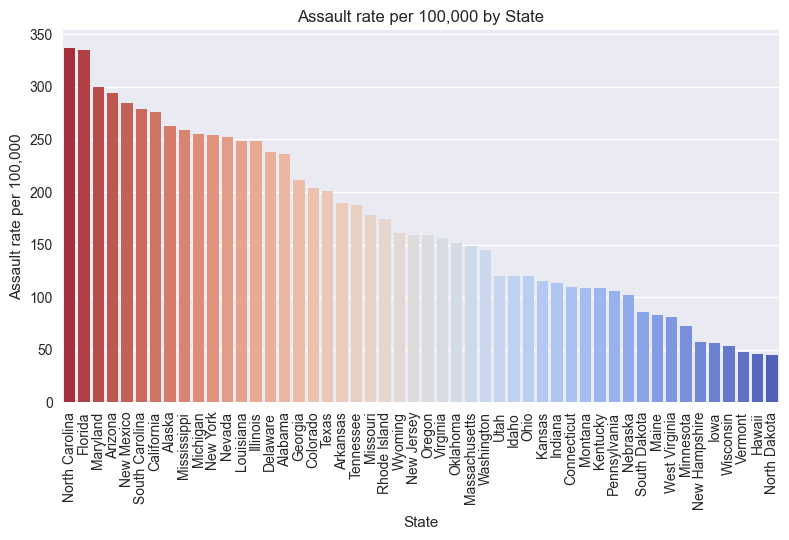

In [25]:
grapher(x_col = 'State',y_col = 'Assault',color = 'coolwarm_r')

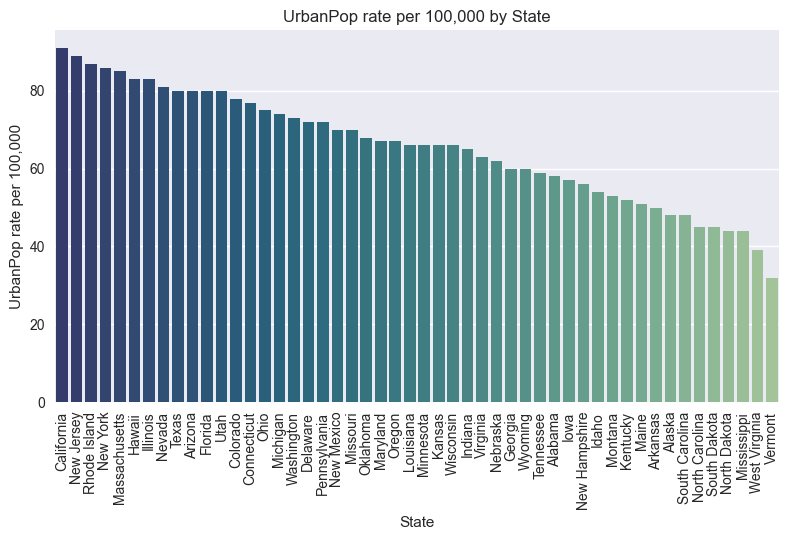

In [26]:
grapher(x_col = 'State',y_col = 'UrbanPop',color = 'crest_r')

## Geographical region dichotomous variable segmentation

In [27]:
south = [ 'Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi','North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
west = ['Montana', 'Wyoming', 'Colorado', 'New Mexico', 'Idaho', 'Utah', 'Arizona','Nevada','Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island','Vermont']
midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']

def region(x):
    if x in south:
        return 'south'
    elif x in west:
        return 'west'
    elif x in northeast:
        return 'northeast'
    else:
        return 'midwest'
    
arrest['Region'] = arrest['State'].apply(region)

In [28]:
def grapher2(x_col,y_col,color,measure):
    plt.style.use('seaborn')
    crime_data = arrest.sort_values([y_col],ascending = False)
    sns.barplot(x = crime_data[x_col], y = crime_data[y_col],palette = color,ci = None)
    plt.ylabel(f'Average {y_col} {measure}')
    plt.title(f'Average {y_col} {measure} by Region')
    plt.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\1920481347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


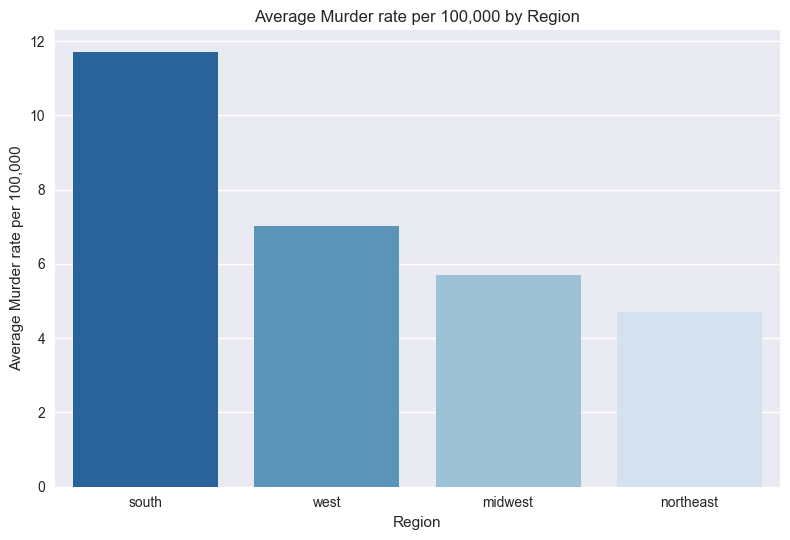

In [29]:
grapher2(x_col = 'Region',y_col = 'Murder',color = 'Blues_r',measure = 'rate per 100,000')

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\1920481347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


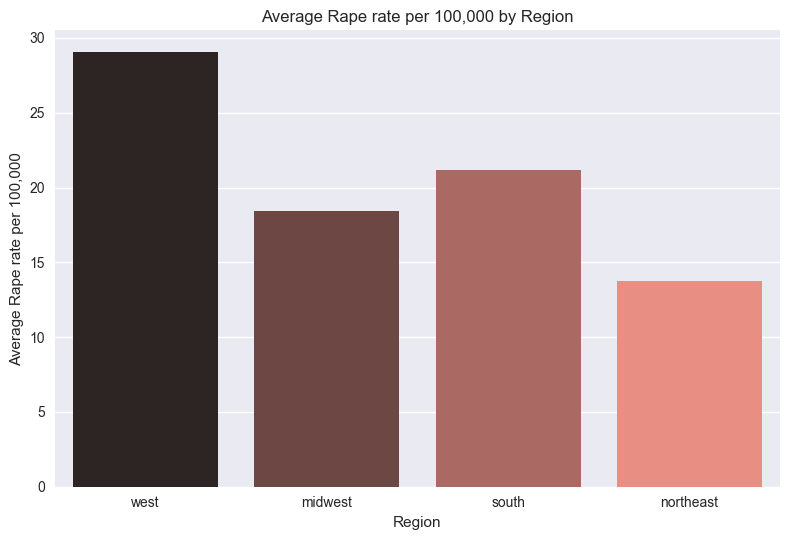

In [30]:
grapher2(x_col = 'Region',y_col = 'Rape',color = 'dark:salmon',measure = 'rate per 100,000')

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\1920481347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


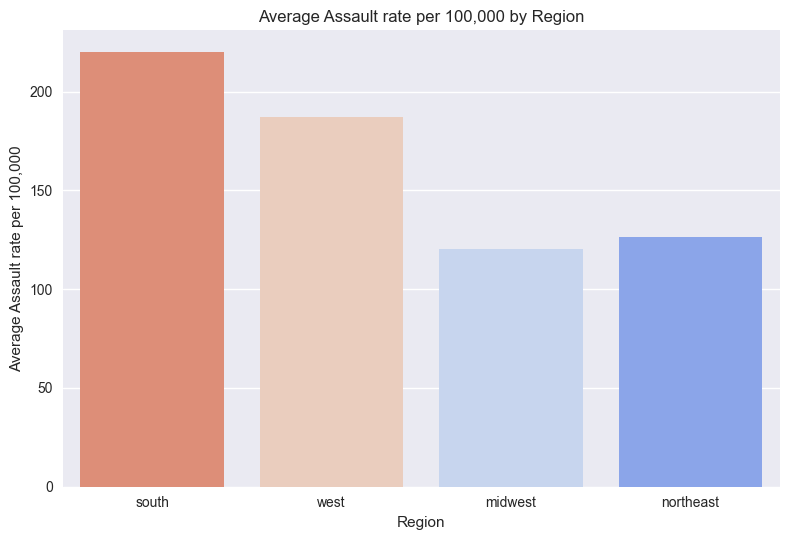

In [31]:
grapher2(x_col = 'Region',y_col = 'Assault',color = 'coolwarm_r',measure = 'rate per 100,000')

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\1920481347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


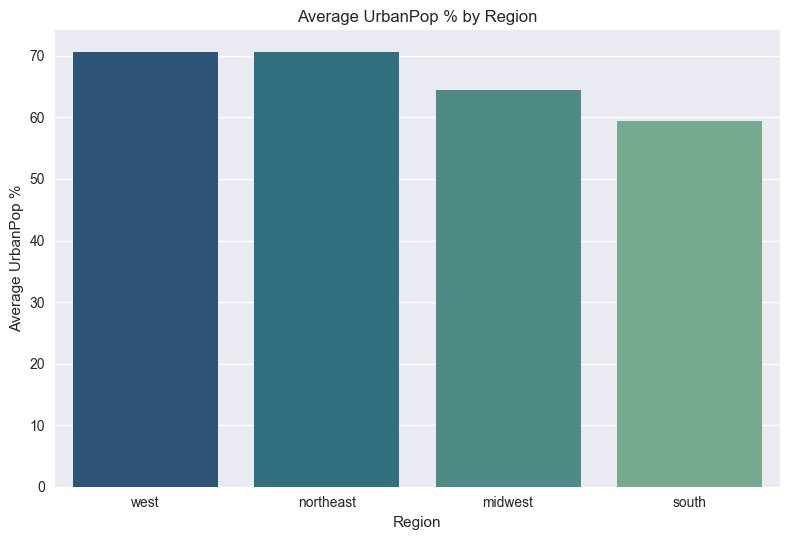

In [32]:
grapher2(x_col = 'Region',y_col = 'UrbanPop',color = 'crest_r',measure = '%')

## Population % dichotomous variable segmentation

In [33]:
def pop_category(x):
    if x < 50:
        return 'low'
    elif 50 <= x < 70:
        return 'mid'
    elif 70 <= x < 90:
        return 'high'
    else:
        return 'very high'
    
arrest['population category'] = arrest['UrbanPop'].apply(pop_category)

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\1920481347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


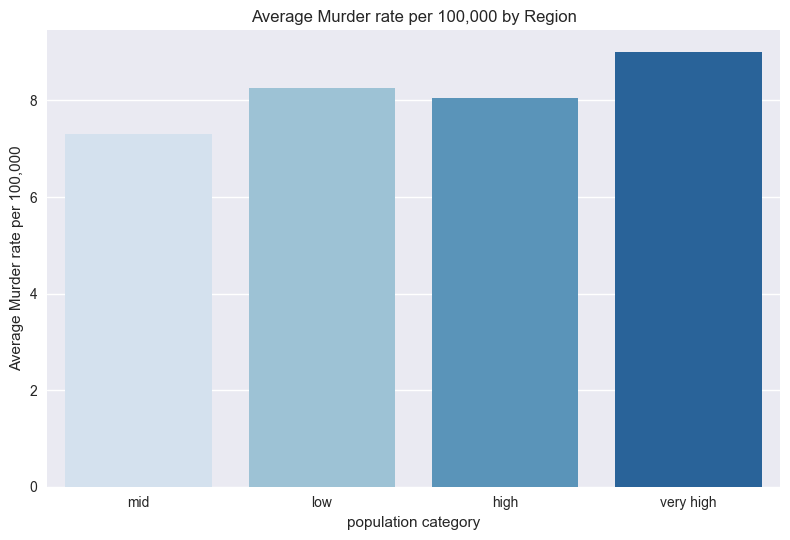

In [34]:
grapher2(x_col = 'population category',y_col = 'Murder',color = 'Blues',measure = 'rate per 100,000')

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\1920481347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


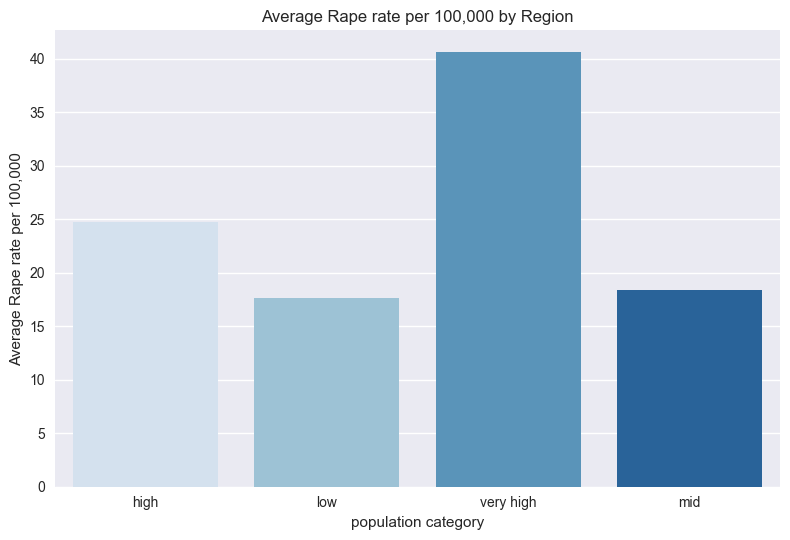

In [35]:
grapher2(x_col = 'population category',y_col = 'Rape',color = 'Blues',measure = 'rate per 100,000')

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\1920481347.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


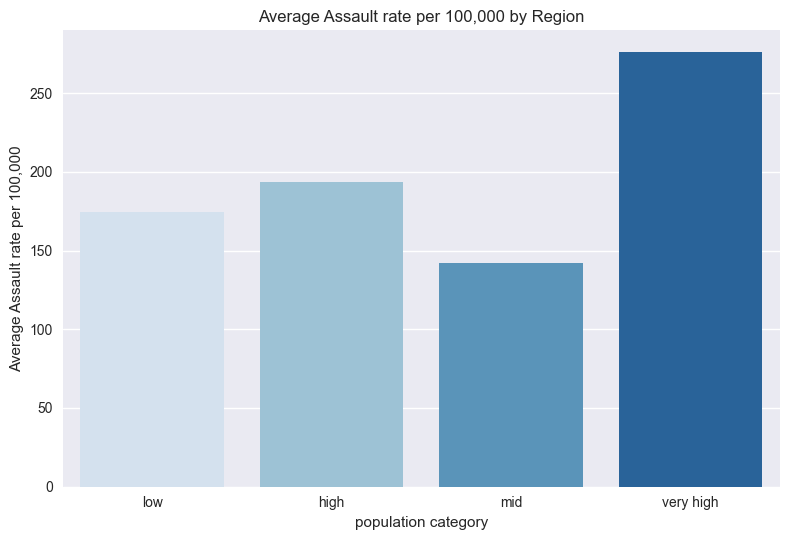

In [36]:
grapher2(x_col = 'population category',y_col = 'Assault',color = 'Blues',measure = 'rate per 100,000')

### Correlations

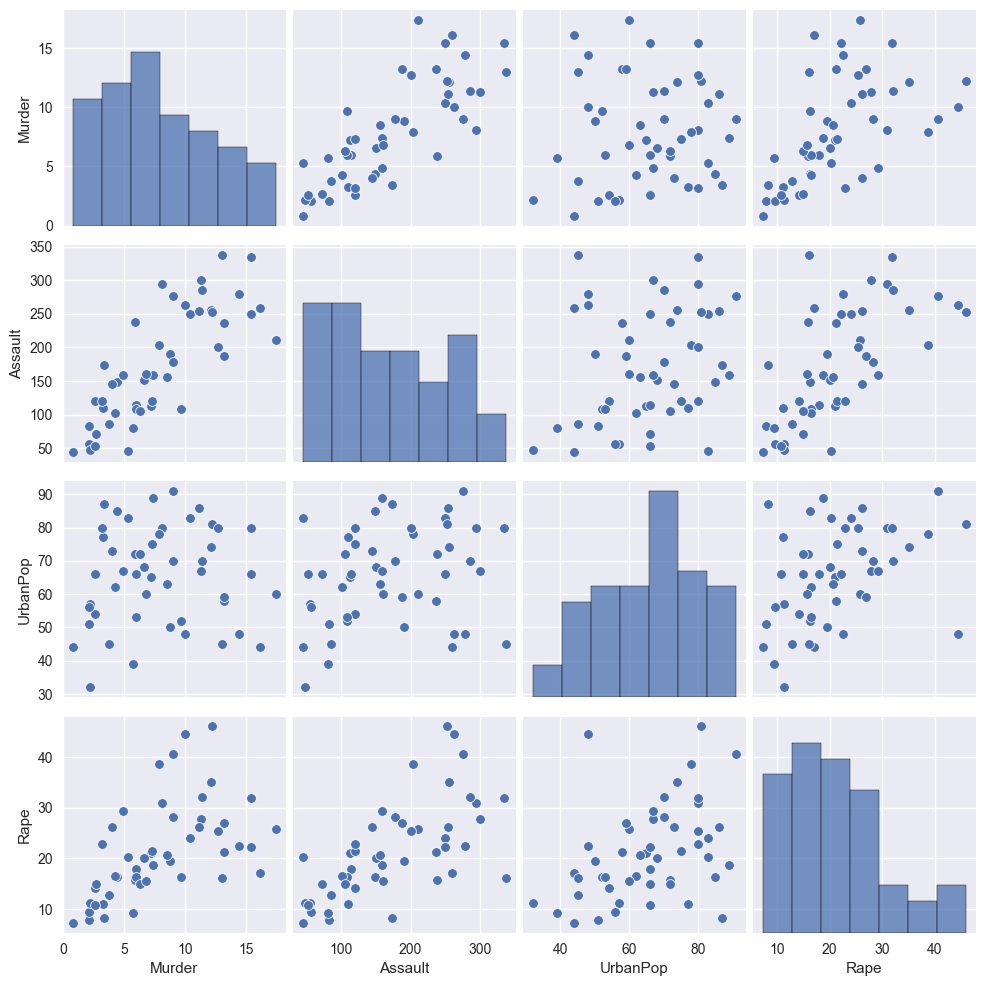

In [37]:
sns.pairplot(arrest)

In [38]:
arrest.corr().style.background_gradient(axis=0)

C:\Users\HP\AppData\Local\Temp\ipykernel_17252\2575986625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  arrest.corr().style.background_gradient(axis=0)


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


## Regression Analysis: Understanding relationships between these variables

In [39]:
south = [ 'Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi','North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
west = ['Montana', 'Wyoming', 'Colorado', 'New Mexico', 'Idaho', 'Utah', 'Arizona','Nevada','Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island','Vermont']
midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']

In [40]:
def assigner(value,bucket):
    if value in bucket:
        return 1
    else:
        return 0
    
arrest['South'] = arrest['State'].apply(assigner,bucket = south)
arrest['West'] = arrest['State'].apply(assigner,bucket = west)
arrest['Northeast'] = arrest['State'].apply(assigner,bucket = northeast)
arrest['Midwest'] = arrest['State'].apply(assigner,bucket = midwest)

In [47]:
# linear regression
import statsmodels.api as sm
variables = ['Assault','UrbanPop','Rape','South','West','Northeast']
X = arrest[variables]
y = arrest['Murder']
X = sm.add_constant(X) 
res = sm.OLS(y, X).fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Murder   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     30.14
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           6.97e-14
Time:                        20:27:54   Log-Likelihood:                -102.77
No. Observations:                  50   AIC:                             219.5
Df Residuals:                      43   BIC:                             232.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7335      1.506      0.487      0.6

In [48]:
X.columns

Index(['const', 'Assault', 'UrbanPop', 'Rape', 'South', 'West', 'Northeast'], dtype='object')

In [43]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] =  [variance_inflation_factor(X, i) for i in range(len(X.columns))]
vif_data = vif_data.drop(0)
vif_data

,feature,VIF
1,Assault,2.800821
2,UrbanPop,1.506544
3,Rape,3.262611
4,South,2.356982
5,West,1.926237
6,Northeast,1.660349
